In [1]:
import pandas as pd
df=pd.read_csv("survey_responses.csv")
df2=pd.read_csv("survey_questions_meta.csv")

In [2]:
'''
print(df.info())
print(df.isnull().sum())
print(df2.info())
print(df2.isnull().sum())
'''

'\nprint(df.info())\nprint(df.isnull().sum())\nprint(df2.info())\nprint(df2.isnull().sum())\n'

In [3]:
import statistics as st
import math as m
i=st.mean(df["Q7-How much effort do you make to interact with others ?"].dropna())
k=m.floor(i)
for j in (df["Q7-How much effort do you make to interact with others ?"].isna()):
    if(j==True):
        df["Q7-How much effort do you make to interact with others ?"].fillna(value=k,inplace=True) 
    else:
        pass

In [4]:
i=st.mean(df["Q8-About How events are you aware about ?"].dropna())
k=m.floor(i)
for j in (df["Q8-About How events are you aware about ?"].isna()):
    if(j==True):
        df["Q8-About How events are you aware about ?"].fillna(value=k,inplace=True) 
    else:
        pass

In [5]:
#df.drop(["Q9-What is an ideal student life ?"],axis=1,inplace=True)
useful_info=["Q5-Stressed about Adjustment issues",       
"Q5-Stressed about Academic issues",                                                                                                
"Q5-Stressed about Financial issues",                                                                                               
"Q5-Stressed about Family issues",                                                                                                  
"Q5-Stressed about Friendships",                                                                                                    
"Q5-Stressed about Romantic relationships",                                                                                       
"Q5-Stressed about  Health related issues",                                                                                         
"Q5-Stressed about Career related issues",                                                                                        
"Q5-Stressed about My involvement in hostel, clubs, societies, interest groups, etc.",                                              
"Q4-Passionate about Animal welfare",                                                                                              
"Q4-Passionate about Arts/Culture/Heritage",                                                                                        
"Q4-Passionate about Children/Youth",                                                                                               
"Q4-Passionate about Community building",                                                                                         
"Q4-Passionate about Diversity & Inclusion (e.g. special needs, migrant worker, interfaith and intercultural understanding)",     
"Q4-Passionate about Environmental sustainability",                                                                                
"Q4-Passionate about Families",                                                                                                     
"Q4-Passionate about Health/Well-being (e.g mental health)",                                                                                                                                                                              
"Q4-Passionate about Poverty reduction",                                                                                          
"Q4-Passionate about Education"]
factors=dict()
for i in useful_info:
    factors[i]=df2[i]
df_factors= pd.DataFrame (factors, columns = factors.keys())

In [6]:
print(df.info())
print(df.isnull().sum())
print(df_factors.info())
print(df_factors.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2958 entries, 0 to 2957
Data columns (total 19 columns):
Career                                                      2958 non-null object
Citizenship                                                 2958 non-null object
Nationality                                                 2958 non-null object
Year since Matriculation                                    2958 non-null int64
Year of Study                                               2958 non-null int64
Primary Programme                                           2958 non-null object
Gender                                                      2958 non-null object
Department                                                  2958 non-null object
Housing Type                                                2958 non-null object
Q1-How many events have you Volunteered in ?                2958 non-null int64
Q2-How many events have you Participated in ?               2958 non-null int64
Q3-How

In [7]:
#check if all the reponse ids match
check=[]
for i,j in zip(df,df_factors):
    if(i==j):
        check.append(True)
print(all(check))

True


In [8]:
#add new colums to df
for i in useful_info:
    df[i]=df2[i]

In [67]:
print(df.info())
#print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2958 entries, 0 to 2957
Data columns (total 38 columns):
Career                                                                                                                        2958 non-null object
Citizenship                                                                                                                   2958 non-null object
Nationality                                                                                                                   2958 non-null object
Year since Matriculation                                                                                                      2958 non-null int64
Year of Study                                                                                                                 2958 non-null int64
Primary Programme                                                                                                             2958 non-null object
Gender       

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Career', data=df)

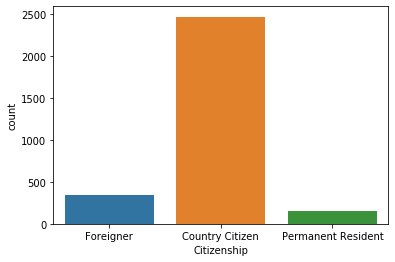

In [11]:
sns.countplot(x='Citizenship', data=df)

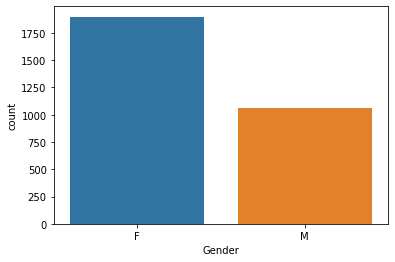

In [12]:
sns.countplot(x='Gender', data=df)

{'Singapore': 2467, 'China': 158, 'Malaysia': 130, 'India': 47, 'Indonesia': 39, 'Viet Nam': 20, 'Canada': 17, 'United States': 15, 'Taiwan': 13, 'Korea, Republic of': 10}


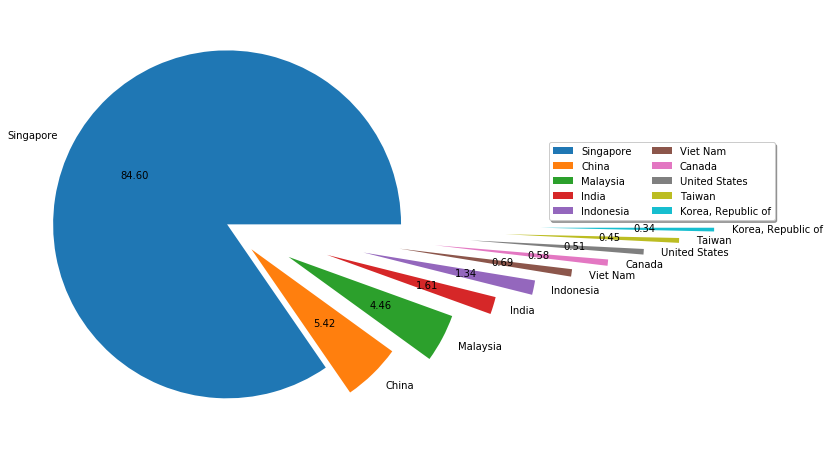

In [13]:
d={}
for i in df['Nationality']:
    if i in d:
        d[i]+=1
    else:
        d[i]=1
sorted_d = sorted(d.items() ,reverse=True,  key=lambda x: x[1])
sorted_d=dict(sorted_d[0:10])
print(sorted_d)
explode=[]
p=0
for i in sorted_d:
    explode.append(p)
    p+=0.2

#plot the pie chart
fig, ax = plt.subplots(figsize =(10, 8)) 
ax.pie(sorted_d.values(), labels =sorted_d.keys(),autopct="%.2f",explode = explode) 
ax.legend(loc='upper center', bbox_to_anchor=(1.5,0.7),shadow=True, ncol=2)
plt.show()

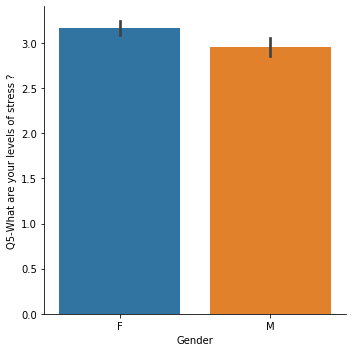

In [14]:
sns.catplot(x='Gender',y='Q5-What are your levels of stress ?',data=df,kind='bar')  # to make bar graph
plt.show()

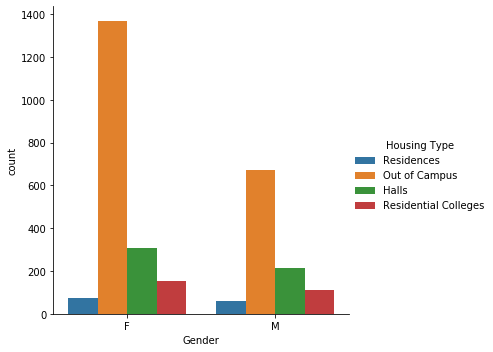

In [15]:
sns.catplot(x="Gender", hue="Housing Type", kind="count", data=df)

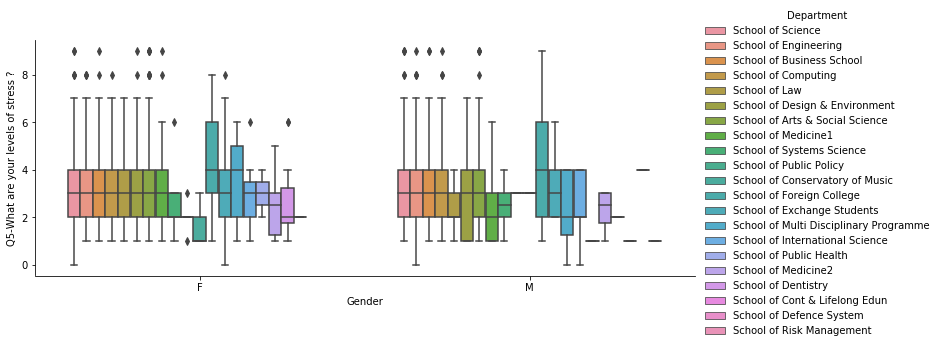

In [16]:
sns.catplot(x="Gender", y="Q5-What are your levels of stress ?", hue="Department", kind="box", data=df,height=4, aspect=2.5)

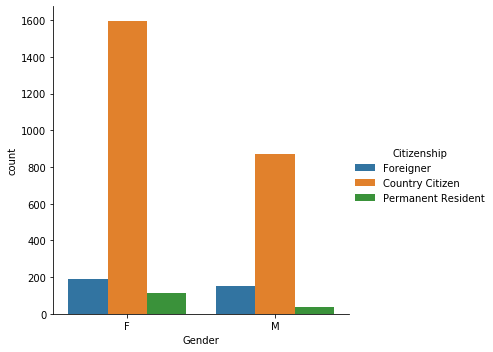

In [17]:
sns.catplot(x="Gender", hue="Citizenship", kind="count", data=df)

In [18]:
f={}
m={}
for i,j in zip(df['Citizenship'],df["Gender"]):
    if j=="F":
        if i in f:
            f[i]+=1
        else:
            f[i]=1
    else:
        if i in m:
            m[i]+=1
        else:
            m[i]=1
print(f,m)

{'Foreigner': 191, 'Country Citizen': 1596, 'Permanent Resident': 112} {'Foreigner': 152, 'Country Citizen': 871, 'Permanent Resident': 36}


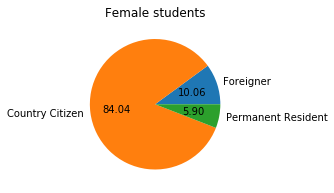

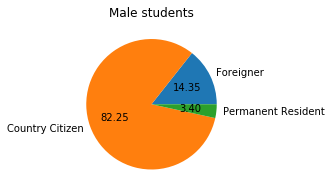

In [19]:
fig, ax = plt.subplots(figsize =(5, 3)) 
ax.pie(f.values(), labels =f.keys(),autopct="%.2f")
plt.title("Female students")
plt.show()
fig, ax = plt.subplots(figsize =(5, 3)) 
ax.pie(m.values(), labels =m.keys(),autopct="%.2f")
plt.title("Male students")
plt.show()

In [20]:
stress_info=["Q5-Stressed about Adjustment issues",       
"Q5-Stressed about Academic issues",                                                                                                
"Q5-Stressed about Financial issues",                                                                                               
"Q5-Stressed about Family issues",                                                                                                  
"Q5-Stressed about Friendships",                                                                                                    
"Q5-Stressed about Romantic relationships",                                                                                       
"Q5-Stressed about  Health related issues",                                                                                         
"Q5-Stressed about Career related issues",                                                                                        
"Q5-Stressed about My involvement in hostel, clubs, societies, interest groups, etc."]
stress_factors_count={}
for i in stress_info:
    stress_factors_count[i]=df[i].eq("Yes").sum()
print(stress_factors_count)

{'Q5-Stressed about Adjustment issues': 907, 'Q5-Stressed about Academic issues': 2728, 'Q5-Stressed about Financial issues': 1142, 'Q5-Stressed about Family issues': 436, 'Q5-Stressed about Friendships': 798, 'Q5-Stressed about Romantic relationships': 490, 'Q5-Stressed about  Health related issues': 447, 'Q5-Stressed about Career related issues': 1346, 'Q5-Stressed about My involvement in hostel, clubs, societies, interest groups, etc.': 811}


In [21]:
#'Q6-How Satisfied You are with your Student Life ?'

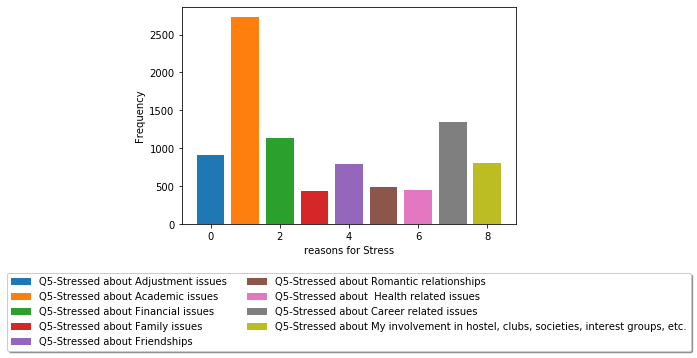

In [22]:
ax = plt.subplot(1,1,1)
k=0
for i,j in zip(stress_factors_count.values(),stress_factors_count.keys()):
    ax.bar(k,i,label=j)
    k+=1
plt.legend()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),shadow=True, ncol=2)
plt.xlabel('reasons for Stress')
plt.ylabel('Frequency')
plt.show()

In [23]:
passion_info=["Q4-Passionate about Animal welfare",                                                                                              
"Q4-Passionate about Arts/Culture/Heritage",                                                                                        
"Q4-Passionate about Children/Youth",                                                                                               
"Q4-Passionate about Community building",                                                                                         
"Q4-Passionate about Diversity & Inclusion (e.g. special needs, migrant worker, interfaith and intercultural understanding)",     
"Q4-Passionate about Environmental sustainability",                                                                                
"Q4-Passionate about Families",                                                                                                     
"Q4-Passionate about Health/Well-being (e.g mental health)",                                                                                                                                                                              
"Q4-Passionate about Poverty reduction",                                                                                          
"Q4-Passionate about Education"]
passion_factors_count={}
for i in passion_info:
    passion_factors_count[i]=df[i].eq("Yes").sum()
print(passion_factors_count)

{'Q4-Passionate about Animal welfare': 1053, 'Q4-Passionate about Arts/Culture/Heritage': 1087, 'Q4-Passionate about Children/Youth': 1118, 'Q4-Passionate about Community building': 735, 'Q4-Passionate about Diversity & Inclusion (e.g. special needs, migrant worker, interfaith and intercultural understanding)': 624, 'Q4-Passionate about Environmental sustainability': 817, 'Q4-Passionate about Families': 575, 'Q4-Passionate about Health/Well-being (e.g mental health)': 1006, 'Q4-Passionate about Poverty reduction': 672, 'Q4-Passionate about Education': 1082}


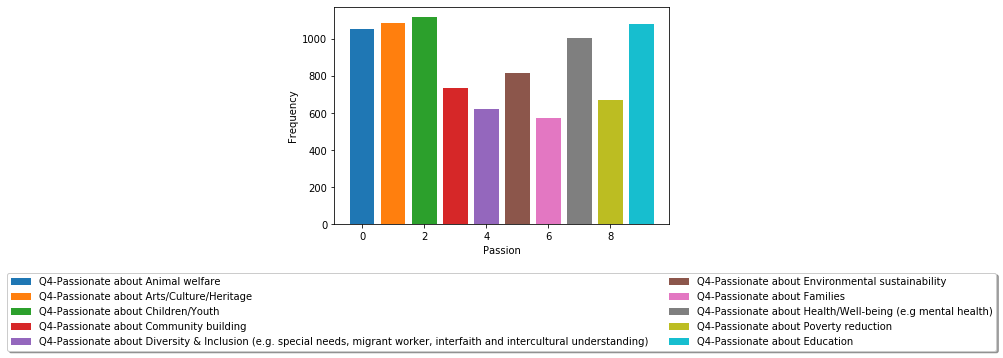

In [24]:
ax = plt.subplot(1,1,1)
k=0
for i,j in zip(passion_factors_count.values(),passion_factors_count.keys()):
    ax.bar(k,i,label=j)
    k+=1
plt.legend()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),shadow=True, ncol=2)
plt.xlabel('Passion')
plt.ylabel('Frequency')
plt.show()

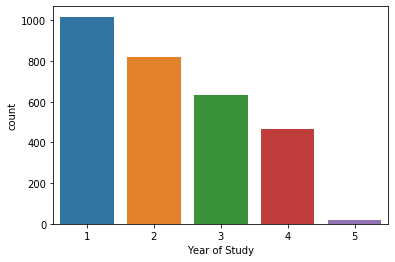

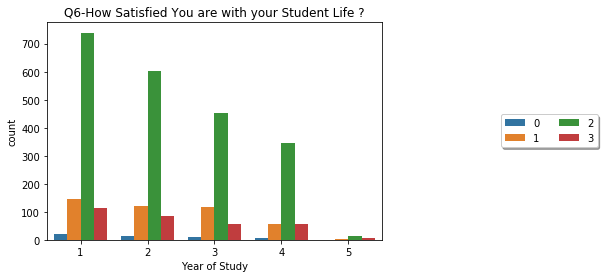

In [72]:
axi = plt.subplot(1,1,1)
axi=sns.countplot(x='Year of Study', data=df)
plt.show()
ax = plt.subplot(1,1,1)
ax=sns.countplot(x='Year of Study', hue="Q6-How Satisfied You are with your Student Life ?", data=df)
ax.legend(loc='upper center', bbox_to_anchor=(1.5, 0.6),shadow=True, ncol=2)
plt.title("Q6-How Satisfied You are with your Student Life ?")
plt.show()

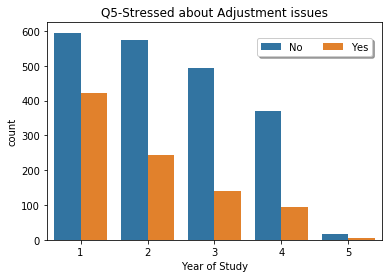

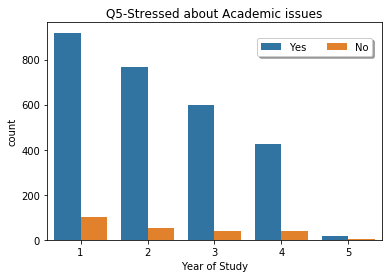

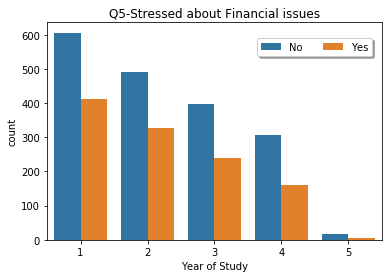

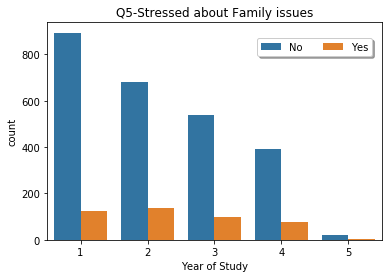

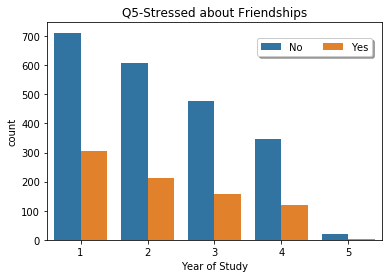

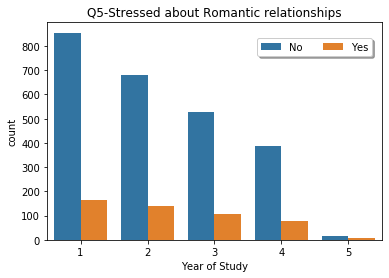

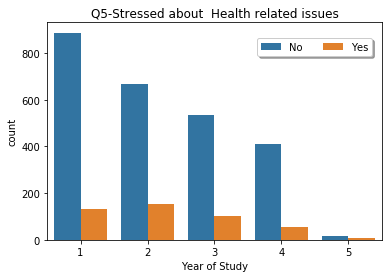

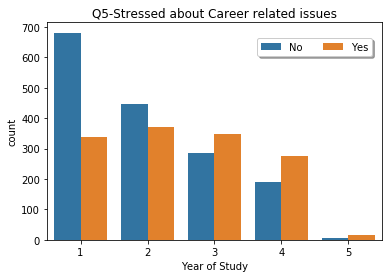

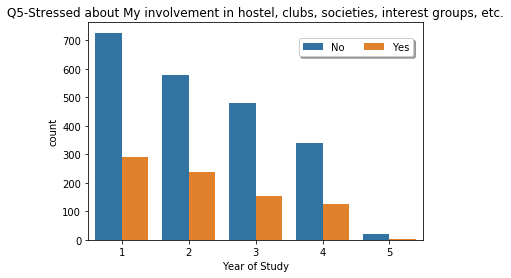

In [81]:
for i in stress_info:
    ax = plt.subplot(1,1,1)
    ax=sns.countplot(x='Year of Study', hue=i, data=df)
    ax.legend(loc='upper center', bbox_to_anchor=(0.8, 0.95),shadow=True, ncol=2)
    plt.title(i)
    plt.show()

In [75]:
'''for i in stress_info:
    ax = plt.subplot(1,1,1)
    ax=sns.countplot(x=i, hue="Q6-How Satisfied You are with your Student Life ?", data=df)
    ax.legend(loc='upper center', bbox_to_anchor=(1.5, 0.6),shadow=True, ncol=2)
    plt.title("Q6-How Satisfied You are with your Student Life ?")
    plt.show()
'''

'for i in stress_info:\n    ax = plt.subplot(1,1,1)\n    ax=sns.countplot(x=i, hue="Q6-How Satisfied You are with your Student Life ?", data=df)\n    ax.legend(loc=\'upper center\', bbox_to_anchor=(1.5, 0.6),shadow=True, ncol=2)\n    plt.title("Q6-How Satisfied You are with your Student Life ?")\n    plt.show()\n'